# Final Project Submission

Please fill out:
* Student name: <strong>Michael Mahoney</strong>
* Student pace: self paced / <strong>part time</strong> / full time
* Scheduled project review date/time: 
* Instructor name: <strong>James Irving</strong>
* Blog post URL:


# Project Overview
## Scpoe
The purpose of this project is to explore the King County Housing data to discover what variables are the best predictors of sale price. The following elements will be considered to be the primary scope of the project.

###  Question 1: 
###  Question 2: 
###  Question 3: 

## Methodology: CRISP-DM
* Investigating the existing data
* Cleaning data by discarding or replacing null and/or filler data
* Analysis of the independant variables
* Preforming a linear regression analysis of the data and revising as needed

# Package Dependancies
* Numpy
* Pandas
* Matplotlib.pyplot
* scipy.stats
* Seaborn
* statsmodels
* scikit-learn

# Baseline Data-Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scripts


In [2]:
# Toggle the following line to show all columns
pd.set_option('display.max_columns', None)

## First Look

In [3]:
# Import the data set for pre-processing and save it to a variable
dfInitial = pd.DataFrame(pd.read_csv('kc_house_data.csv'))
print(f'The DataFrame is of dimensions {dfInitial.shape} \n')
display(dfInitial.head())
display(dfInitial.describe())


The DataFrame is of dimensions (21597, 21) 



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From our info list we see that many of the data types have been imput incorrectly. We will now go through reassign the correct data types for use in the regression model.

## Changing Column Data Types

### Date-times

The date column appears to be the only datetime column. It is currectly assigned to dtype 'object' which is the string type in pandas. We use the following code to change this column to the correct type.

In [4]:
dfInitial['date'] = pd.to_datetime(dfInitial['date'])

We check to make sure the conversion was successful

In [5]:
dfInitial.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Numerical

There also only appear to be one mis-typed numerical column, being 'sqft_basement'. Because the column has null values encoded as the question mark symbol '?', we will replace this with the none type and address this later.

In [6]:
dfInitial['sqft_basement'].loc[dfInitial['sqft_basement'] == '?'] = None
dfInitial['sqft_basement'].isna().sum()
dfInitial['sqft_basement'] = pd.to_numeric(dfInitial['sqft_basement'])
dfInitial.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Categorical

We now look to re-assign to categories. When looking at our columns, there are several instances of categories being coded as numerical columns. From the descrtiption of our columns as provided in the repository the following columns are better encoded as categories: 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms' and 'floors'. Pandas has a specific dtype called 'category' for this type of encoding.

In [7]:
# We are going to do something special to the 'yr_renovated' column to change its type to  first
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].apply(lambda x: int(x) if x == None else x)
# dfInitial['yr_renovated'] = dfInitial['yr_renovated'].astype('object')
dfInitial['view'] = dfInitial['view'].apply(lambda x: int(x) if x == None else x)
dfInitial['view'] = dfInitial['view'].astype('object')
catCols = ['waterfront', 'view', 'condition', 'grade', 'zipcode'] #'yr_built', 'yr_renovated',
dfInitial[catCols] = dfInitial[catCols].astype('category')
dfInitial.info()
dfInitial['yr_renovated']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  category      
 9   view           21534 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

With everything typed correctly we now move on to cleaning the data

## Detecting and Managing Null Values

### Finding placeholder values

Place holder values are entries of non-null data that are meant to serve as null data. As we've seen, there has already been one instance of place holder values in the sqft_basement column that we changed to null in order to cast the column as a new data type. We now formally go through all columns and determine the method for dealing with these values (which cannot be present for regression techniques). A common way to find these values is to map the usage of values in each column. 

In [8]:
for x in dfInitial.columns:
    display(dfInitial[x].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

Somewhat remarkably, it looks like the 'sqft_basement' column was the only one to contain placeholder values. 

### Null Values

The first question to answer is whether we should drop any columns outright based on missing data. We do a quick proportionality test for the null values as follows.

In [9]:
dfInitial.isna().sum()/len(dfInitial['id'])

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

Normally, for a column to be missing more than 10% of the data is worth considering throwing out. However, for our baseline model we will keep all columns in and decide if they warrant removal after the initial round of regression. As a further baseline measure we will fill these null values with the average for numerical data and the median for categorical data.

#### Numerical Null Values

The numerical columns with null values are 'sqft_basement'. We proceed by finding the mean of the non-null data and using this value as a fill in. 

In [10]:
scripts.fillNull(dfInitial, ['sqft_basement'], showInfo = True)        


'Column sqft_basement now has 0 null values'

'The mean of column sqft_basement = 291.851723974838'

0.000000       12826
291.851724       454
600.000000       217
500.000000       209
700.000000       208
               ...  
588.000000         1
1920.000000        1
2390.000000        1
1245.000000        1
1135.000000        1
Name: sqft_basement, Length: 304, dtype: int64

#### Null categorical data

The catagorical columns with nulls are: 'waterfront', 'view' and 'yr_renovated'. For the baseline model we will make the null values into their own column.

In [11]:
scripts.fillNull(dfInitial, ['waterfront', 'view','yr_renovated'],numericalData = False, showInfo = True)

'Column waterfront now has 0 null values'

'The mean of column waterfront = Null'

0.0     19075
Null     2376
1.0       146
Name: waterfront, dtype: int64

'Column view now has 0 null values'

'The mean of column view = Null'

0.0     19422
2.0       957
3.0       508
1.0       330
4.0       317
Null       63
Name: view, dtype: int64

'Column yr_renovated now has 0 null values'

'The mean of column yr_renovated = Null'

0.0       17011
Null       3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1948.0        1
1946.0        1
1944.0        1
1934.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

## Removing Duplicated

Now that all null values have been dealt with we will do one final processing step to make sure there aren't any duplicates that will skew our regression analysis. 

In [12]:
dfInitial[dfInitial.duplicated(subset = 'id', keep = False)]#.sum()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,Null,0,3,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,Null,0,3,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0.0,2013,0,98065,47.5184,-121.886,2850,6000


With no duplicated entries we create a copy of the processed data for the regression steps.

In [13]:
dfPreprocessed = dfInitial.copy()
dfPreprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  category      
 9   view           21597 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Removing Outliers

Our data is almost clean enough to begin modeling. The final step will be to remove outliers that skewing our data and will lead to less accurate models. We will begin with the approach of dropping all data points that lie 3-standard deviations ourside of the mean for each of the numeric columns. For categorical we will use the value counts method to determine the proportionality of data and drop things accordingly. 

In [27]:
dfPreprocessed.select_dtypes('number').drop(columns = 'id')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,47.5345,-122.069,1410,1287


In [28]:
def dropNumericOutliers(df, throwAwayThreshold = .05): # replace with number? Double check id drop
    outlierIndicies = []
    try:
        dfNumeric = df.select_dtypes(['int64','float64']).drop(columns = 'id')
    except:
        dfNumeric = df.select_dtypes(['int64','float64'])
        print("Didn't drop id")
    for x in dfNumeric.columns:
        mean = dfNumeric[x].mean()
        std = dfNumeric[x].std()
        indecies = dfNumeric.loc[(dfNumeric[x] < mean - 3*std) | (dfNumeric[x] > mean + 3*std)].index
        print(f"{x} had {len(indecies)} entires")
        for index in indecies:
            if index in outlierIndicies:
                pass
            else:
                outlierIndicies.append(index)
    print(f"Total number of outliers: {len(outlierIndicies)}")
    print('\n')
    print(f'Combined all the outliers make up {dfNumeric.shape[0]/len(outlierIndicies)}% of the data')
    
    return df.drop(index = outlierIndicies)
        


In [29]:
dfPreprocessed = dropNumericOutliers(dfPreprocessed)

price had 363 entires
bedrooms had 199 entires
bathrooms had 29 entires
sqft_living had 87 entires
sqft_lot had 472 entires
floors had 0 entires
sqft_above had 153 entires
sqft_basement had 148 entires
yr_built had 0 entires
lat had 0 entires
long had 37 entires
sqft_living15 had 134 entires
sqft_lot15 had 579 entires
Total number of outliers: 1625


Combined all the outliers make up 12.328% of the data


# Building The Baseline Model

## Numerical Data

### Validating Assumptions of Linear Regression

We begin the modeling process with our numerical data. As this project is concerned with linear regression, our first question to answer is whether the data meets the assumptions of a linear model.

#### Linearity

In [17]:
# sns.pairplot(dfPreprocessed)

This are looking linear in general. We will proceed with the baseline model as though the linear assumption is satisfied. Subsequent models will take a more serious approach. 

#### Normality Of Numerical Data

In [18]:
# stats.normaltest()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000,20033.000000
mean,12.999309,3.324664,2.049443,7.510965,8.883633,1.481081,7.357644,268.804708,1970.255628,47.560923,-122.224050,7.513382,8.866549
std,0.473714,0.857055,0.695420,0.392341,0.759713,0.538774,0.400001,393.170295,29.469021,0.139311,0.128881,0.307600,0.683805
min,11.264464,1.000000,0.500000,5.913503,6.253829,1.000000,5.913503,0.000000,1900.000000,47.176400,-122.512000,6.131226,6.478510
25%,12.660328,3.000000,1.500000,7.244228,8.517193,1.000000,7.064759,0.000000,1951.000000,47.471100,-122.332000,7.293018,8.517193
50%,12.994530,3.000000,2.000000,7.528332,8.905851,1.000000,7.326466,0.000000,1973.000000,47.572700,-122.246000,7.495542,8.916640
75%,13.329378,4.000000,2.500000,7.799753,9.209740,2.000000,7.649693,510.000000,1996.000000,47.680100,-122.138000,7.731931,9.172639
max,14.310207,6.000000,4.250000,8.465900,11.829297,3.000000,8.359369,1600.000000,2015.000000,47.777600,-121.797000,8.304495,11.449187


'NormaltestResult(statistic=29.274993469121295, pvalue=4.395577476155137e-07)'

'NormaltestResult(statistic=257.98707436356074, pvalue=9.523982764010079e-57)'

'NormaltestResult(statistic=393.2861792946323, pvalue=3.971835578446916e-86)'

'NormaltestResult(statistic=319.36599892346345, pvalue=4.4725425401657096e-70)'

'NormaltestResult(statistic=851.4386036284703, pvalue=1.2955565739625712e-185)'

'NormaltestResult(statistic=1498.1476638638646, pvalue=0.0)'

'NormaltestResult(statistic=505.9062114592422, pvalue=1.392714192586436e-110)'

'NormaltestResult(statistic=3455.398620413306, pvalue=0.0)'

'NormaltestResult(statistic=1591.5890568041286, pvalue=0.0)'

'NormaltestResult(statistic=1850.616253519906, pvalue=0.0)'

'NormaltestResult(statistic=1267.935670197433, pvalue=4.691022461940216e-276)'

'NormaltestResult(statistic=211.3851673049251, pvalue=1.253990197586564e-46)'

'NormaltestResult(statistic=922.781167223527, pvalue=4.174606406805561e-201)'

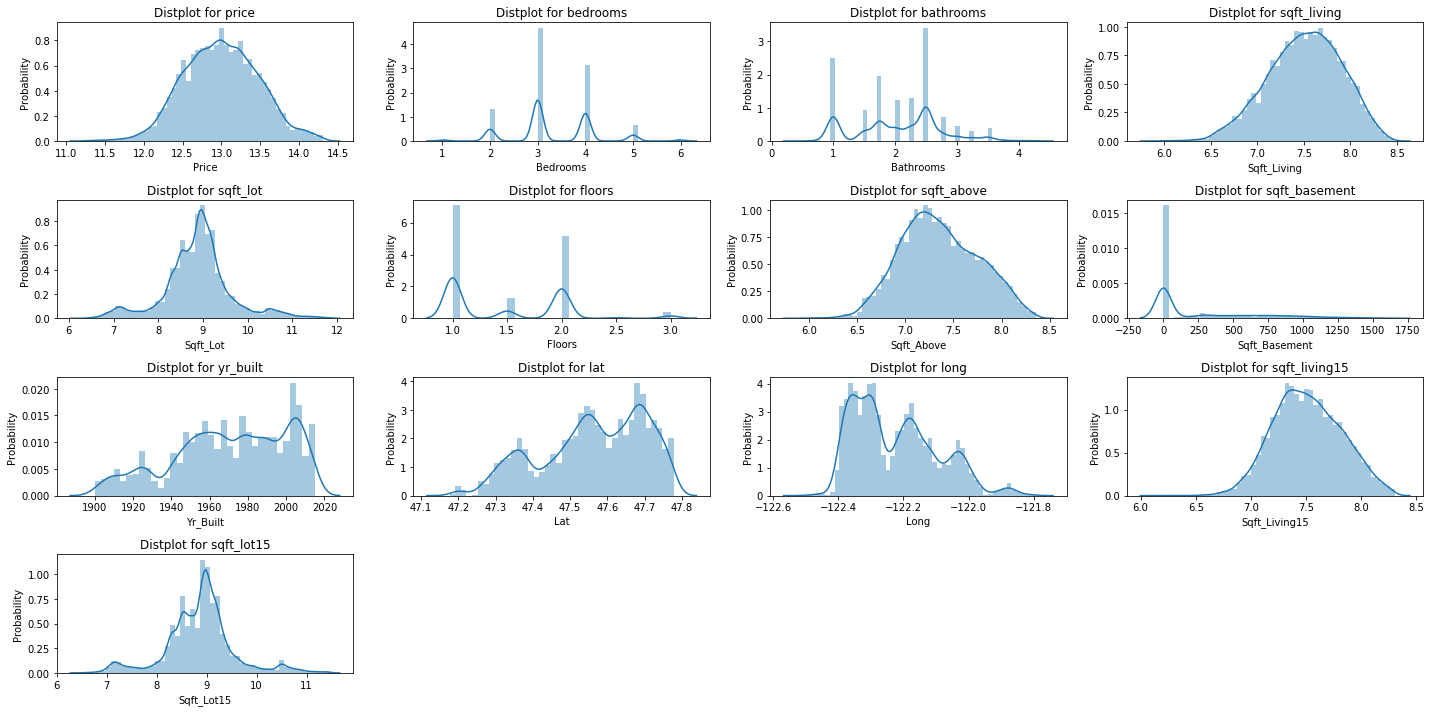

In [19]:
dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1).copy()
locColumns = ['price', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15']
dfNumeric[locColumns] = dfNumeric[locColumns].applymap(lambda x: np.log(x))
display(dfNumeric.describe())
plt.figure(figsize=(20,10))
plotNum = 1
for x in dfNumeric.columns:
    axes = plt.subplot(4, 4, plotNum)
    sns.distplot(a = dfNumeric[x], ax = axes, norm_hist = True)
    plotNum += 1
    plt.title(f'Distplot for {x}')
    plt.xlabel(f'{x.title()}')
    plt.ylabel(f'Probability')
    display(f'{stats.normaltest(dfNumeric[x])}')
plt.tight_layout()

Alas, according to a rigorous test for normality, all numerical columns fail. While normal data would be beneficial, what we really need are for residuals to be normal. Note: For the baseline model we will not be preforming log transforms.

#### Normality Of Residuals

## Standardizing Data

In order for all our independent variable to be clearly represented in the analysis they must be normalized. For the baseline model we will use standard normalization.

In [20]:
for x in dfNumeric.drop(columns = 'price').columns:
    mean = dfNumeric[x].mean()
    std = dfNumeric[x].std()
    dfNumeric[x] = dfNumeric[x].apply(lambda x: (x - mean)/std)
dfNumeric.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,20033.000000,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04,2.003300e+04
mean,12.999309,-6.730169e-16,1.211322e-14,1.997205e-13,-1.850298e-14,3.893078e-14,1.903046e-13,1.019047e-15,3.746816e-16,-2.855033e-13,-2.408878e-12,2.473085e-13,-7.384412e-14
std,0.473714,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,11.264464,-2.712385e+00,-2.228069e+00,-4.071614e+00,-3.461577e+00,-8.929190e-01,-3.610339e+00,-6.836852e-01,-2.384050e+00,-2.760183e+00,-2.234223e+00,-4.493359e+00,-3.492281e+00
25%,12.660328,-3.788137e-01,-7.900888e-01,-6.798619e-01,-4.823403e-01,-8.929190e-01,-7.322090e-01,-6.836852e-01,-6.534193e-01,-6.447676e-01,-8.375900e-01,-7.163996e-01,-5.109001e-01
50%,12.994530,-3.788137e-01,-7.109866e-02,4.426343e-02,2.924515e-02,-8.929190e-01,-7.794478e-02,-6.836852e-01,9.312735e-02,8.453734e-02,-1.703096e-01,-5.799735e-02,7.325318e-02
75%,13.329378,7.879721e-01,6.478914e-01,7.360630e-01,4.292503e-01,9.631480e-01,7.301200e-01,6.134627e-01,8.736080e-01,8.554759e-01,6.676704e-01,7.104977e-01,4.476263e-01
max,14.310207,3.121544e+00,3.164357e+00,2.433938e+00,3.877339e+00,2.819215e+00,2.504305e+00,3.385798e+00,1.518353e+00,1.555350e+00,3.313515e+00,2.571892e+00,3.776862e+00


## Encoding Categorical Data

Moving on to our baseline model we need to encode our categorical data. The approach we will be using in one-hot encoding.

In [21]:
dfcatCols = dfPreprocessed.select_dtypes('category').copy()
encodedCatCols = pd.get_dummies(dfcatCols, drop_first = True)
dfFinal = pd.concat([dfNumeric,encodedCatCols], axis = 1)
dfFinal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Columns: 173 entries, price to zipcode_98199
dtypes: float64(13), uint8(160)
memory usage: 5.2 MB


## Treating Multi-Coolinearity

With all columns seperated out we now will go through the process of removing coolinear columns. For the purposese of this investigation we will use a correlation value of .65 as the threshold of what columns we should remove for being coolinear. 

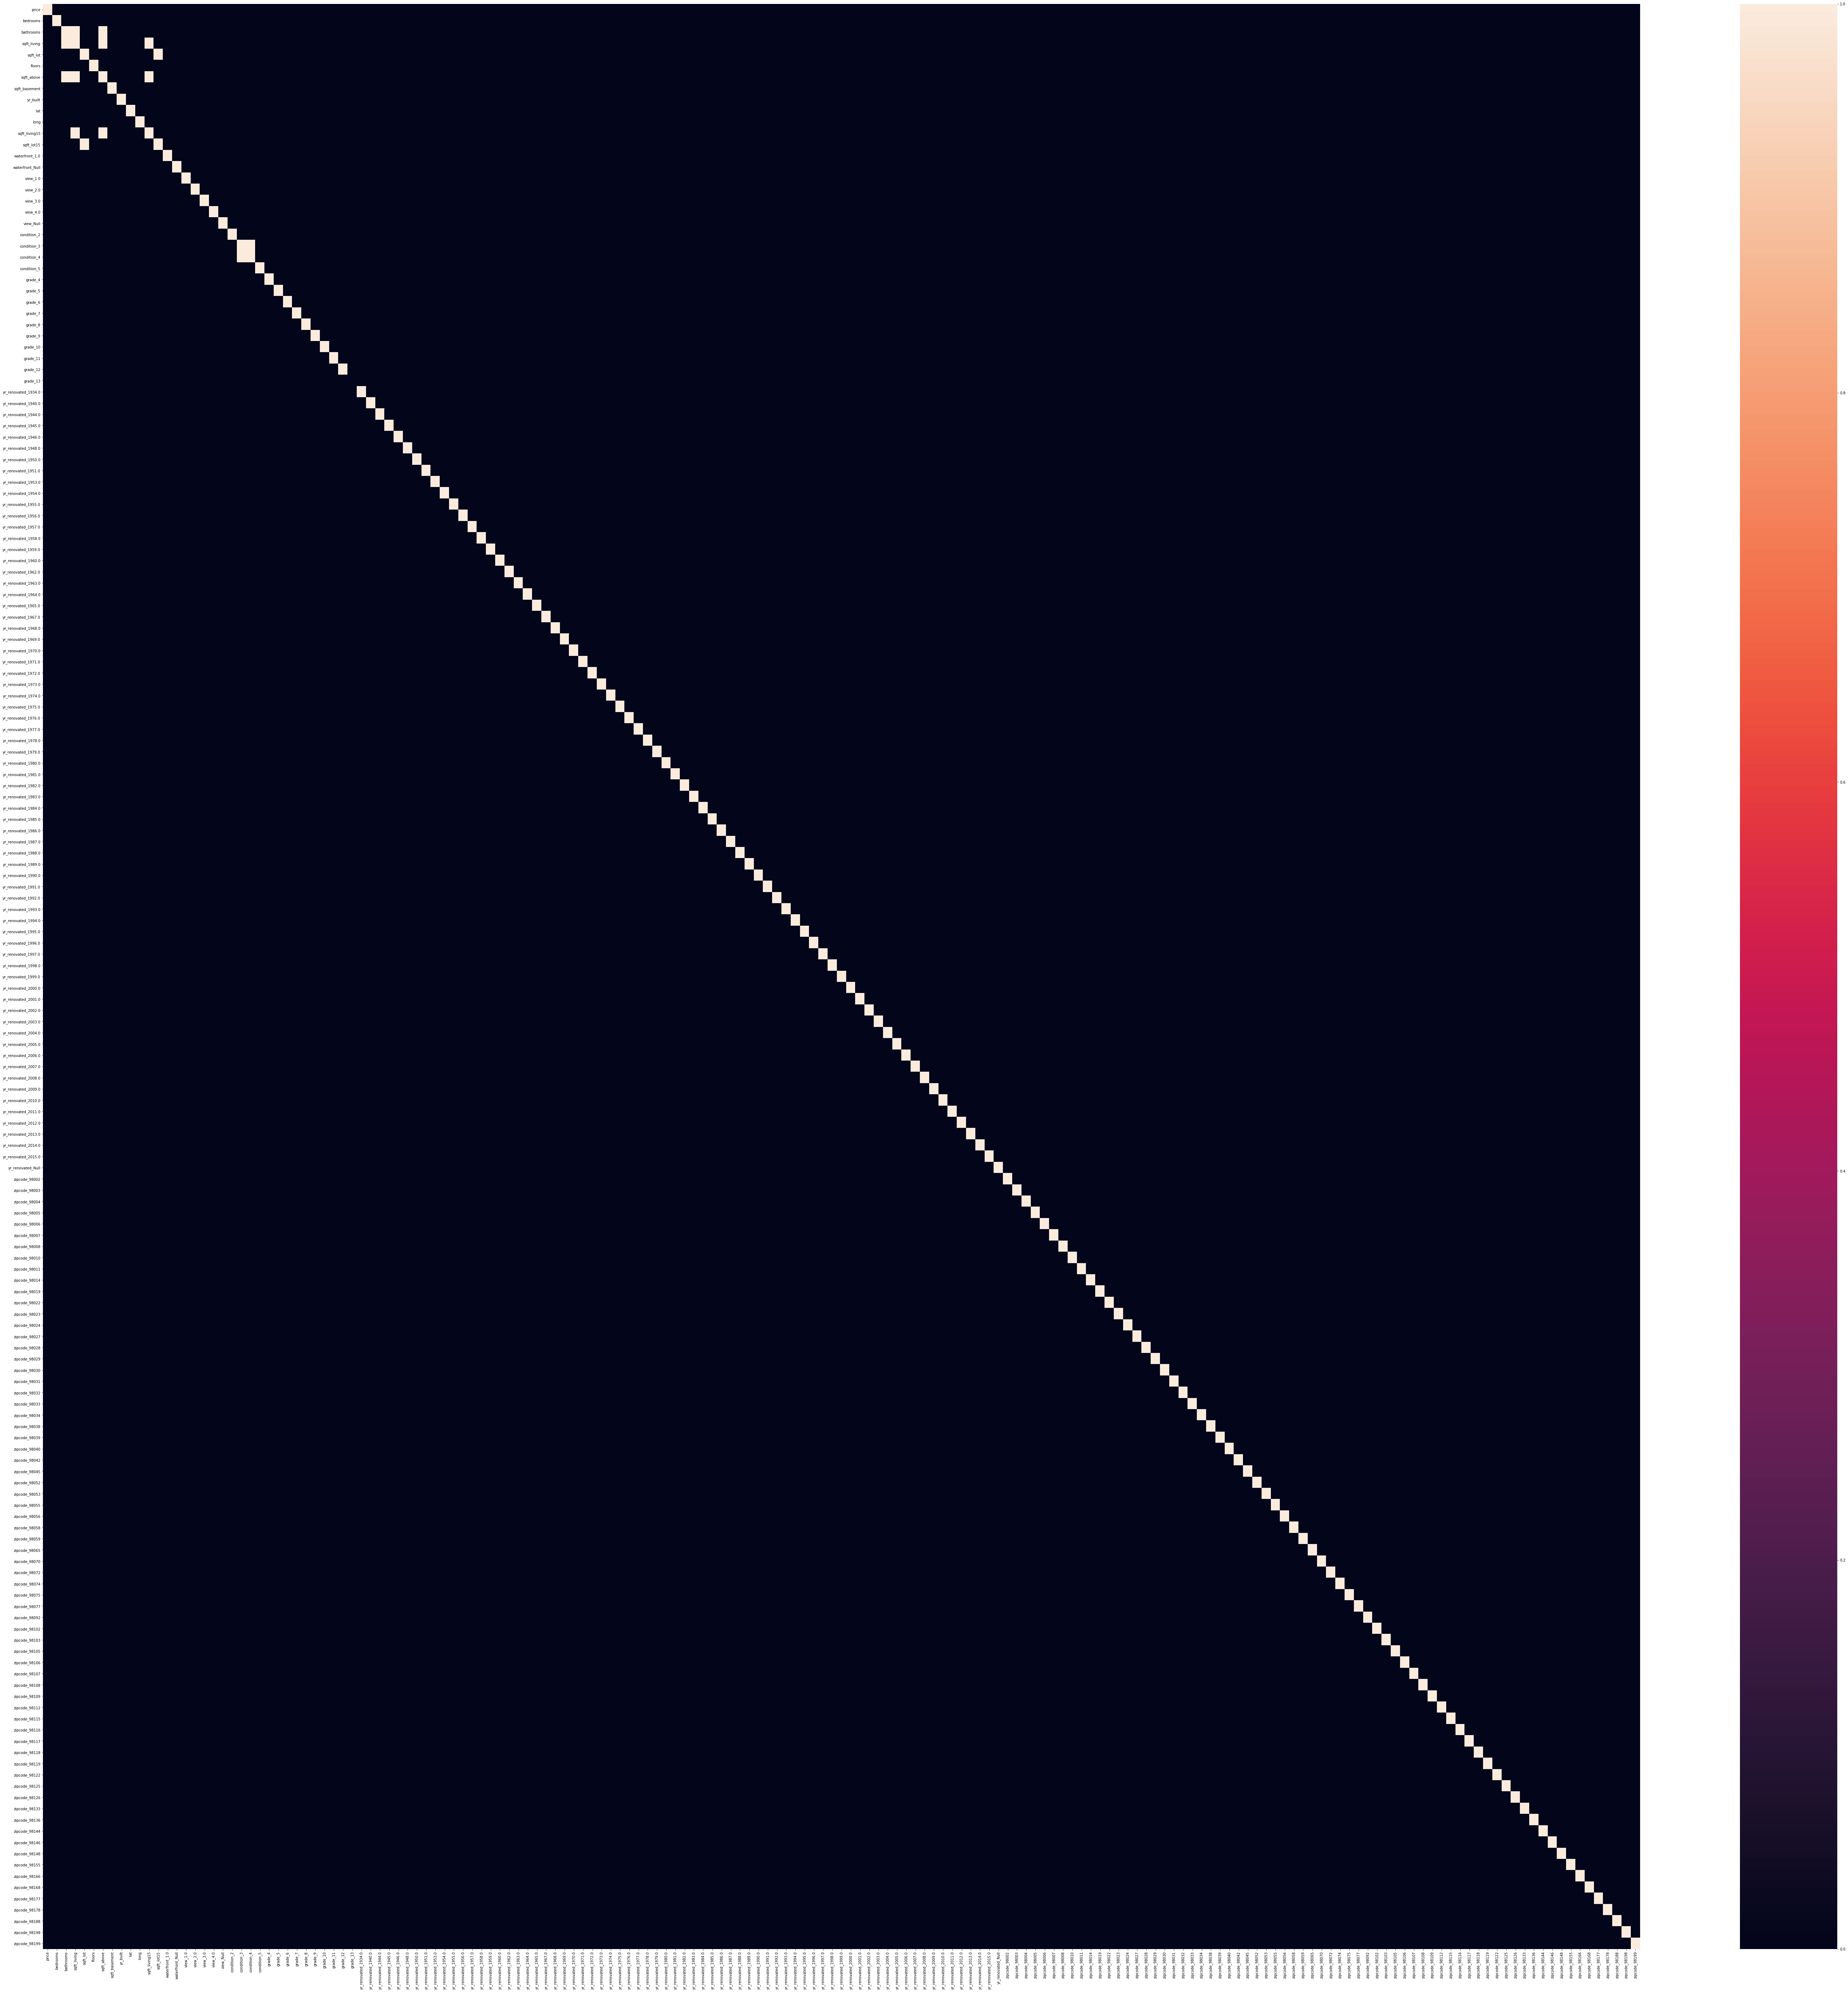

In [22]:
correlations = np.abs(dfFinal.corr())>.65
# display(correlations)
plt.figure(figsize=(100,100))
sns.heatmap(correlations.iloc[:, 0:]);

This representaion isn't remotely useful for presentation but it does show that we are only concerned with the columns in top left corner. 

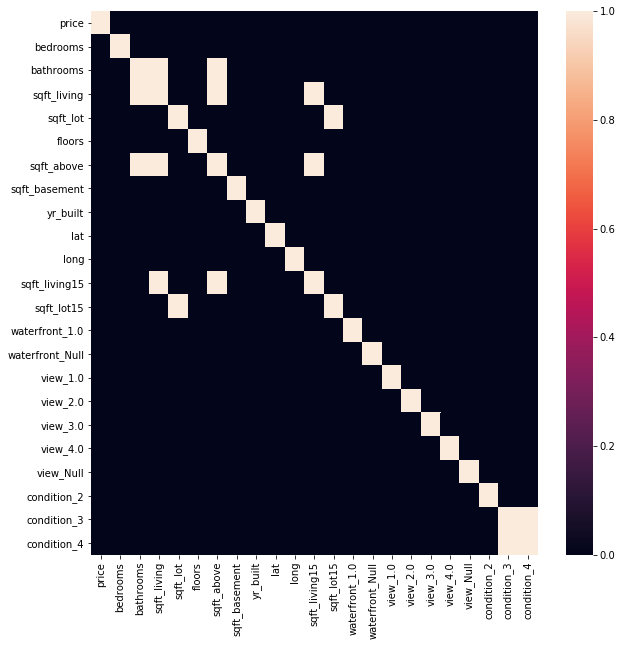

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations.iloc[:23, :23])

The heat map shows the following columns are redundant: Bathrooms, sqft_above, sqft_living15, sqft_lot15, condition_4

In [24]:
dfFinal.drop(labels = ['bathrooms', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'condition_4'], axis = 1, inplace = True)
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Columns: 168 entries, price to zipcode_98199
dtypes: float64(9), uint8(159)
memory usage: 4.6 MB


## Creating The Model

With all the data preped we move forward with creating out baseline model.

In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
Y = dfFinal['price']
X = dfFinal.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfFinal.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     750.4
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:05:54   Log-Likelihood:                 6413.0
No. Observations:               20033   AIC:                        -1.249e+04
Df Residuals:                   19866   BIC:                        -1.117e+04
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0487      0.178     73.114      0.000      12.699      13.399
bedrooms               -0.0062      0.002     -3.659      0.000      -0.009      -0.003
sqft_living             0.2010      0.003     73.471      0.000       0.196       0.206
sqft_lot                0.0422      0.002     21.302      0.000       0.038       0.046
floors                 -0.0066      0.002     -3.192      0.001      -0.011      -0.003
sqft_basement          -0.0305      0.002    -16.981      0.000      -0.034      -0.027
yr_built               -0.0026      0.002     -1.194      0.233      -0.007       0.002
lat                     0.0601      0.011      5.704      0.000       0.039       0.081
long                   -0.0461      0.009     -4.972      0.000      -0.064      -0.028
waterfront_1.0          0.3907      0.025     15.395      0.000       0.341       0.440
waterfront_Null        -0.0014      0.004     -0.354      0.724      -0.009       0.006
view_1.0                0.1308      0.011     12.197      0.000       0.110       0.152
view_2.0                0.1305      0.007     19.486      0.000       0.117       0.144
view_3.0                0.2013      0.010     20.746      0.000       0.182       0.220
view_4.0                0.3158      0.016     19.789      0.000       0.285       0.347
view_Null               0.0424      0.023      1.805      0.071      -0.004       0.088
condition_2            -0.1595      0.015    -10.847      0.000      -0.188      -0.131
condition_3            -0.0363      0.003    -11.154      0.000      -0.043      -0.030
condition_5             0.0684      0.005     13.249      0.000       0.058       0.078
grade_4                -0.5977      0.180     -3.316      0.001      -0.951      -0.244
grade_5                -0.6542      0.177     -3.688      0.000      -1.002      -0.306
grade_6                -0.5823      0.177     -3.288      0.001      -0.929      -0.235
grade_7                -0.5037      0.177     -2.844      0.004      -0.851      -0.157
grade_8                -0.4029      0.177     -2.274      0.023      -0.750      -0.056
grade_9                -0.2746      0.177     -1.549      0.121      -0.622       0.073
grade_10               -0.1996      0.177     -1.125      0.261      -0.547       0.148
grade_11               -0.0964      0.178     -0.542      0.588      -0.445       0.252
grade_12               -0.0203      0.205     -0.099      0.921      -0.422       0.381
grade_13             9.746e-15    1.4e-15      6.941      0.000    6.99e-15    1.25e-14
yr_renovated_1934.0     0.1685      0.177      0.952      0.341      -0.178       0.515
yr_renovated_1940.0    -0.1407      0.125     -1.126      0.260      -0.386       0.104
yr_renovated_1944.0     0.0480      0.177      0.271      0.786      -0.299       0.395
yr_

We now drop the columns with insignificant p-values. 

In [30]:
inSigPVal = list(model.pvalues.loc[model.pvalues.sort_values() > .05].index)
# inSigPVal.remove('const')
dfModelAdjusted = dfFinal.copy()
dfModelAdjusted.drop(labels = inSigPVal, axis = 1, inplace = True)
dfModelAdjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Columns: 107 entries, price to zipcode_98199
dtypes: float64(8), uint8(99)
memory usage: 3.3 MB


In [31]:
Y = dfModelAdjusted['price']
X = dfModelAdjusted.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfModelAdjusted.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1171.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:09:35   Log-Likelihood:                 6273.3
No. Observations:               20033   AIC:                        -1.233e+04
Df Residuals:                   19927   BIC:                        -1.150e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.7906      0.013    948.654      0.000      12.764      12.817
bedrooms               -0.0079      0.002     -4.705      0.000      -0.011      -0.005
sqft_living             0.2056      0.003     75.632      0.000       0.200       0.211
sqft_lot                0.0445      0.002     23.549      0.000       0.041       0.048
floors                 -0.0066      0.002     -3.354      0.001      -0.011      -0.003
sqft_basement          -0.0316      0.002    -17.669      0.000      -0.035      -0.028
lat                     0.0577      0.007      8.183      0.000       0.044       0.071
long                   -0.0486      0.008     -5.772      0.000      -0.065      -0.032
waterfront_1.0          0.3918      0.025     15.488      0.000       0.342       0.441
view_1.0                0.1315      0.011     12.247      0.000       0.110       0.152
view_2.0                0.1337      0.007     19.968      0.000       0.121       0.147
view_3.0                0.2100      0.010     21.755      0.000       0.191       0.229
view_4.0                0.3210      0.016     20.097      0.000       0.290       0.352
condition_2            -0.1606      0.015    -10.880      0.000      -0.190      -0.132
condition_3            -0.0353      0.003    -11.188      0.000      -0.041      -0.029
condition_5             0.0685      0.005     13.302      0.000       0.058       0.079
grade_4                -0.3282      0.035     -9.273      0.000      -0.398      -0.259
grade_5                -0.3886      0.014    -27.859      0.000      -0.416      -0.361
grade_6                -0.3206      0.007    -43.739      0.000      -0.335      -0.306
grade_7                -0.2451      0.005    -47.537      0.000      -0.255      -0.235
grade_8                -0.1487      0.004    -33.900      0.000      -0.157      -0.140
grade_13            -1.317e-15   2.43e-16     -5.428      0.000   -1.79e-15   -8.41e-16
yr_renovated_1954.0     0.4995      0.178      2.811      0.005       0.151       0.848
yr_renovated_1960.0    -0.3193      0.103     -3.103      0.002      -0.521      -0.118
yr_renovated_1963.0    -0.2203      0.103     -2.148      0.032      -0.421      -0.019
yr_renovated_1970.0    -0.1303      0.059     -2.197      0.028      -0.247      -0.014
yr_renovated_1976.0    -0.4749      0.178     -2.674      0.007      -0.823      -0.127
yr_renovated_1988.0     0.1131      0.054      2.105      0.035       0.008       0.218
yr_renovated_1991.0     0.1035      0.046      2.241      0.025       0.013       0.194
yr_renovated_1993.0     0.1195      0.054      2.229      0.026       0.014       0.225
yr_renovated_1999.0     0.1870      0.059      3.153      0.002       0.071       0.303
yr_renovated_2000.0     0.0675      0.037      1.819      0.069      -0.005       0.140
yr_

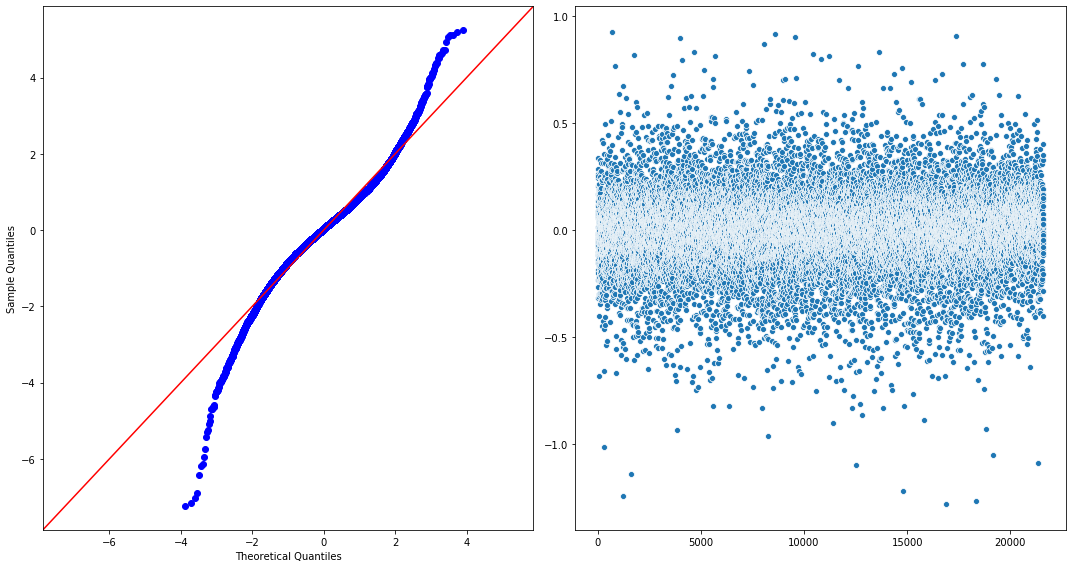

In [32]:
import scipy.stats as stats
residuals = model.resid
plt.figure(figsize=(15,8))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
sns.scatterplot(data = residuals, ax = axes2)
plt.tight_layout()
plt.show()

## Base Model Conclusions

As far as base models go, this was a great first attempt. With an adjusted R-squared value of 0.839. However, this number should be taken with a grain of salt considering we've failed the normal residuals assumption needed for an accurate linear regression. The following models will refine the data further to establish the assumptions.

# Improving The Baseline Model

Taking a close look at our baseline there are several points to pay attention to. In general it seems as though our approach of leaving all available information in the model has paid off rather significantly, no pun intended. Yet, with having rather questionably satisfied many of the assumptions for linear regression some additional constraints must be placed in order to have a mathematically sound model.  



## Treatment Of Outliers

Outliers have a disproportionate ability to affect models and are typically discarded prior to final analysis. I agrue that in terms of sale price, exceptionally low/high valued housed should not be considered outliers in the classical sense. An outlier by definition is a data point that represents an extraordinary break from the distribution of the caused by randomness. They are regarded as quantities that are hard or impossible to predict given a model that would predict the more standard data of a given set. For housing, such disregard for a home of extradinary value isn't in line with the true nature of an outlier because these values can be predicted when considering a proper subset of the original data set. Therefore, our first decision in compiling a refined version of the baseline is to spilt the data sets into three categories. Low sale price, middle sale price and high sale price. This is a tactical decision that is supported by our baseline modle residuals. The QQ plot above showcases piecewise linear residuals. Thus a linear regression should inherantly work, if we can find valid threshholds to seperate the data. To do this we return to the baseline model and find the values at which the slope of our residuals changes substantially. 

In [ ]:
nonOutliers = residuals.loc[(residuals < residuals.quantile(.0035)) | (residuals > residuals.quantile(.9965))]


In [ ]:
stats.ttest_ind(residuals, nonOutliers, equal_var = False)

In [ ]:
sm.graphics.qqplot(nonOutliers, dist=stats.norm, line='45', fit=True, ) #git rid of p-hacking
normalResidualIndecies = list(nonOutliers.index)[:]
dfFinal2 = dfModelAdjusted.loc[normalResidualIndecies]
display(dfFinal2)


## Coefficient Analysis

Our selection process has brought us this far

In [ ]:
finalModel, excludedCols = scripts.removeFeatures(dfFinal, features = [x for x in dfFinal.drop(columns = 'price').columns], target = 'price', rThreshold = .8, pThreshold = .05)

In [ ]:
finalModel.summary()

In [ ]:
excludedCols.sort()
display(excludedCols)

# Conclusions

## Overview

Our final model has reduced the number of variables considerably while achieving an R-squared of .8. Suprisingly, the model concluded that the most influential factors in determining sale price are

* sqft_living
* Being viewed 4 times - High level of interest
* Whether or not the property is waterfront
* Location, Location, Location

All other factors were disregarded as insignificant or found to have only a marginal impact on the sale price. 

## Breakdown

### const - Baseline Price

As a gut check on the model we can use the const parameter to calculate the untransformed baseline price our model predicts. This is the predicted value of a home if we don't feed in any information describing the homes features. <strong>Our model produces a value of 312,475 dollars for the baseline.</strong>

### sqft_living - Total Living Area Square Feet

Both sqft_living and sale price underwent a logirithmic transform before being fed into the final model. The coefficient for sqft living was concluded to be .5576. Using this coefficient we can untransform our data to yield <strong>a rate of 212.76 dollor price increase per square foot</strong> from the baseline. 

### waterfront_1.0 - Waterfront Property

This variable was categorical and thus is a binary choice of, 'the property is waterfront' and the 'property is not waterfront'. Because of this, the model assigns a value that describes what being a waterfront property does to the overal value of the home. Untransforming the data, <strong>having a waterfront property increases the homes value by 771,163</strong> dollars from the baseline

### view_4.0 - Has Been Viewed 4 Times

Also categorical, the view variable reports the number of times a property has been viewed. The only value to survive the analysis was if th eproperty was viewed 4 times, which was also the maximum number of times any property was viewed according to the database. Our model suggests that properties that are viewed 4 times have a <strong>price increase of 614,239 dollars from the baseline.</strong> 

### Various Zipcodes

The final categorical variable was the zipcode in which the home resides. There are several different zipcodes that made the final model which ultimately means that location is highly significant in influencing home price. This is despite the limitation that any home can only be in 1 zip code category at a time. There is a table in the appendix which shows the complete breakdown of of the zipcodes included in the model. 

In [ ]:
def untransform(params):
    description = {}
    for x in params.index:
        description[x] = np.e**((params[x]*dfNumeric['price'].std())+dfNumeric['price'].mean())
    return description 
untransform(finalModel.params)


# Appendix

In [ ]:
sns.scatterplot(x = dfFinal2['sqft_living'], y = dfFinal2['price'])